In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("LoanApprovalPrediction.csv")  
print(data.head(5))


data.drop(['Loan_ID'],axis=1,inplace=True)
print(data.head(5))


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [1]:
#barplot
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  

NameError: name 'data' is not defined

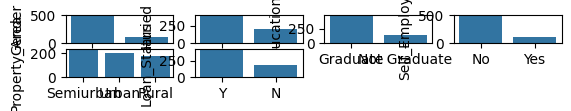

In [4]:
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=0)
  sns.barplot(x=list(y.index), y=y) 
  index +=1

plt.show()


In [5]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

print(data.head(5))

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0             5849   
1       1        1         1.0          0              0             4583   
2       1        1         0.0          0              1             3000   
3       1        1         0.0          1              0             2583   
4       1        0         0.0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [6]:
for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean()) 


from sklearn.model_selection import train_test_split 
  
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 

print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(598, 11) (598,)
(358, 11) (240, 11) (358,) (240,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 

Accuracy score of  RandomForestClassifier = 82.5
[[ 45  28]
 [ 14 153]]


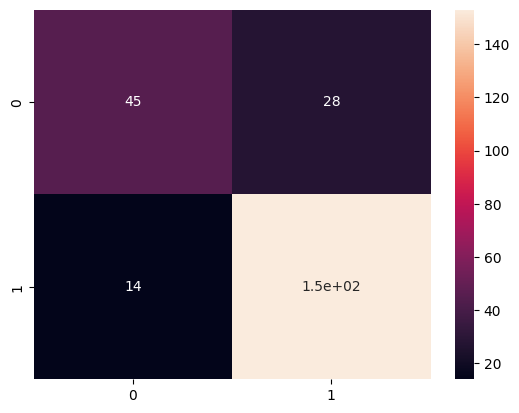

0.8192398119122257
Accuracy score of  KNeighborsClassifier = 63.74999999999999
[[ 19  54]
 [ 33 134]]


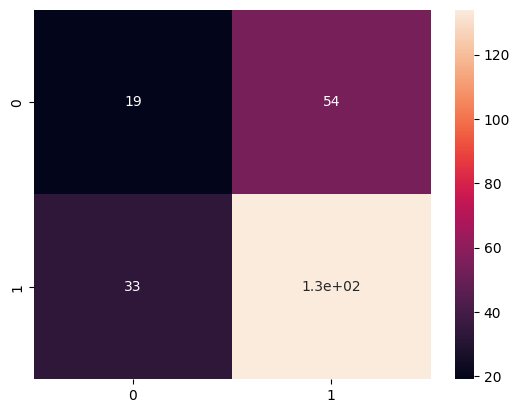

0.6177718309859155
Accuracy score of  SVC = 69.16666666666667
[[  0  73]
 [  1 166]]


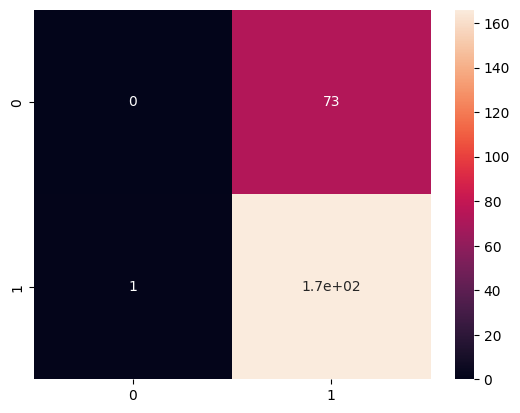

0.5690065681444991
Accuracy score of  LogisticRegression = 80.83333333333333
[[ 35  38]
 [  8 159]]


c:\Users\Tushaan Soi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


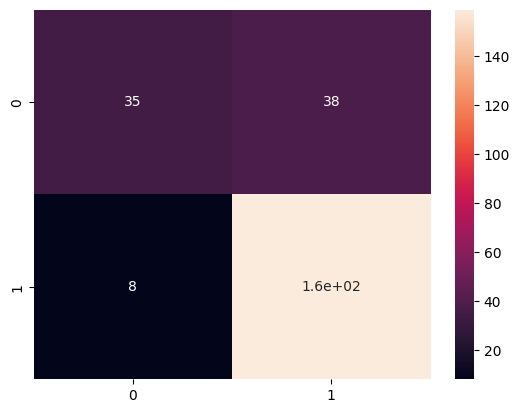

0.7914472022230643


In [8]:
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_test,  
                                         Y_pred))
    #confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test, Y_pred)
    print(cm)   
    sns.heatmap(cm, annot=True)
    plt.show()

    #f1 score
    from sklearn.metrics import f1_score
    print(f1_score(Y_test, Y_pred, average='weighted'))
    
